# Example: Zoom Discrete Fourier Transform (DFT)

In [1]:
import sys
import numpy as np 
import matplotlib.pyplot as plt

sys.path.append('..')
import czt

# Optional
# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Generate Time-Domain Signal for Example

In [2]:
# Time data
t = np.arange(0, 20e-3, 1e-4)
dt = t[1] - t[0]
Fs = 1 / dt
N = len(t)

print("Sampling period:    {:5.2f} ms".format(dt * 1e3))
print("Sampling frequency: {:5.2f} kHz".format(Fs / 1e3))
print("Nyquist frequency:  {:5.2f} kHz".format(Fs / 2 / 1e3))
print("Number of points:   {:5d}".format(N))

Sampling period:     0.10 ms
Sampling frequency: 10.00 kHz
Nyquist frequency:   5.00 kHz
Number of points:     200


In [3]:
# Signal data
def model1(t):
    """Exponentially decaying sine wave with higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t) + 
              0.3 * np.sin(2 * np.pi * 2.5e3 * t) + 
              0.1 * np.sin(2 * np.pi * 3.5e3 * t)) * np.exp(-1e3 * t)
    return output

def model2(t):
    """Exponentially decaying sine wave without higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t)) * np.exp(-1e3 * t)
    return output

sig = model1(t)

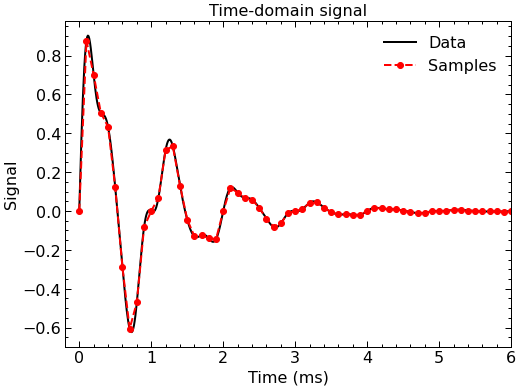

In [4]:
# Plot time-domain data
plt.figure()
t_tmp = np.linspace(0, 6, 601) / 1e3
plt.plot(t_tmp*1e3, model1(t_tmp), 'k', label='Data')
plt.plot(t*1e3, sig, 'ro--', label='Samples')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([-0.2, 6])
plt.legend()
plt.title("Time-domain signal")
plt.savefig("results/signal.png", dpi=600);

# Frequency-domain

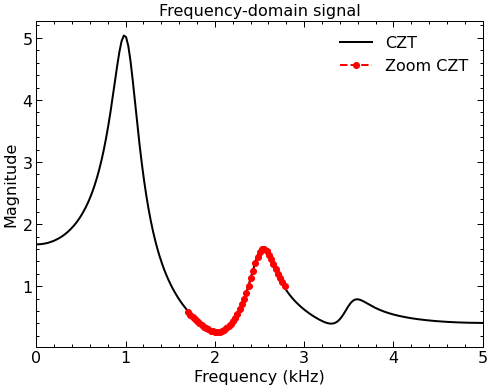

In [5]:
freq, sig_f = czt.time2freq(t, sig)
df = freq[1] - freq[0]

freq_zoom = np.arange(1700, 2800, df)
_, sig_f_zoom = czt.time2freq(t, sig, freq_zoom)

plt.figure()
plt.plot(freq / 1e3,      np.abs(sig_f),      'k-',   label='CZT')
plt.plot(freq_zoom / 1e3, np.abs(sig_f_zoom), 'ro--', label='Zoom CZT')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Magnitude")
plt.xlim([freq.min()/1e3, freq.max()/1e3])
plt.legend()
plt.title("Frequency-domain signal")
plt.savefig("results/zoom-czt.png", dpi=600);